<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project Basic Modeling: Funk SVD  </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

<br>
<br>
<br>


### Camilo Salazar <br> BrainStation <br> October 21, 2023

In [2]:
# imports usefull libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#loading all dataframes
book_df = pd.read_csv('data/books.csv')
tags_df = pd.read_csv('data/tags.csv')
book_tags_df = pd.read_csv('data/book_tags.csv')
ratings_df = pd.read_csv('data/ratings.csv')

In [10]:
from surprise import Dataset
from surprise.reader import Reader
from surprise.prediction_algorithms.matrix_factorization import SVD as FunkSVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

In [11]:
reader = Reader(rating_scale=(1, 5))
my_dataset = Dataset.load_from_df(ratings_df, reader)

In [42]:
trainset, testset = train_test_split(my_dataset, test_size = 0.25,random_state= 42)

In [44]:
model = FunkSVD()
model.fit(trainset)

In [45]:
predictions = model.test(testset)

print('Models Accuracy')
print(f'RMSE = {accuracy.rmse(predictions, verbose=False)}')
print(f'MAE  = {accuracy.mae(predictions, verbose=False)}')
print(f'FCP  = {accuracy.fcp(predictions, verbose=False)}')

Models Accuracy
RMSE = 0.835157330442925
MAE  = 0.64522275061524
FCP  = 0.6642795876688242


In [210]:
def multytest_funksvd(train, test, nf = 100, ne = 20, lr = 0.005, bsd = False, cv =5, vs =0 ):
    RMSE = []
    MAE = []
    FCP = []
    for i in range(cv):
        model = FunkSVD(n_factors=nf,
                            n_epochs=ne, 
                            lr_all= lr,
                            biased= bsd,
                            verbose=vs)
        model.fit(train)
        predictions = model.test(test)
        RMSE.append(accuracy.rmse(predictions, verbose=False))
        MAE.append(accuracy.mae(predictions, verbose=False))
        FCP.append(accuracy.fcp(predictions, verbose=False))
    
    meanframe = pd.DataFrame({'NFactors':[nf],
                             'Epochs': [ne],
                             'Learning Rate': [lr],
                             'RMES': [np.mean(RMSE)],
                            'MAE': [np.mean(MAE)],
                            'FCP' : [np.mean(FCP)]})
    return meanframe


In [50]:
multytest_funksvd(trainset,testset, nf = 10)

,Number of Factors,Epochs,Learning Rate,RMES,MAE,FCP
0,10,20,0.005,0.835177,0.650207,0.667408


In [195]:
def error_plts(df,x):    
    plt.subplots(1,3,figsize = (18,6),facecolor = "#fffbf0")
    
    ax = plt.subplot(1,3,1)
    ax.set_facecolor("#fffbf0")
    plt.plot(df[x],df['RMES'],
             label = f'MIN RMES = {np.round(df["RMES"].min(),4)},\n{x} = {df[df["RMES"] == df["RMES"].min()][x].iloc[0]}',
             color = '#26a69a')
    plt.legend()
    plt.title('RMES')
    plt.xticks(df[x],df[x])
    plt.xlabel(f'{x}')
    plt.grid()

    ax = plt.subplot(1,3,2)
    ax.set_facecolor("#fffbf0")
    plt.plot(df[x],df['MAE'], 
             label = f'MIN MAE = {np.round(df["MAE"].min(),4)},\n{x} = {df[df["MAE"] == df["MAE"].min()][x].iloc[0]}',
             color = '#26a69a')
    plt.legend()
    plt.title('MAE')
    plt.xticks(df[x],df[x])
    plt.xlabel(f'{x}')
    plt.grid()
    
    ax = plt.subplot(1,3,3)
    ax.set_facecolor("#fffbf0")
    plt.plot(df[x],df['FCP'],
             label = f'MAX FCP = {np.round(df["FCP"].max(),4)},\n{x} = {df[df["FCP"] == df["FCP"].max()][x].iloc[0]}',
             color = '#26a69a')
    plt.legend()
    plt.xticks(df[x],df[x])
    plt.title('FCP')
    plt.xlabel(f'{x}')
    plt.grid()
    
    plt.suptitle(f'{x} Accuracy Metrics Plots', fontsize = 18)
    plt.tight_layout()
    plt.show()

In [122]:
# Test Different number of factors in the model
#nfact_df = pd.DataFrame([])
parmet = [30,40,50,60,70,80,90,100,110,120,130,140]
for p in parmet:
    nfact_df = pd.concat([nfact_df,multytest_funksvd(trainset,testset, nf = p)])

nfact_df 

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,30,20,0.005,0.829383,0.643824,0.674373
0,40,20,0.005,0.828561,0.642724,0.675275
0,50,20,0.005,0.828394,0.642268,0.675935
0,60,20,0.005,0.828405,0.642166,0.676022
0,70,20,0.005,0.828452,0.642059,0.676179
0,80,20,0.005,0.828379,0.641967,0.676405
0,90,20,0.005,0.828672,0.642120,0.676267
0,100,20,0.005,0.828808,0.642176,0.676619
0,110,20,0.005,0.829042,0.642368,0.676295
0,120,20,0.005,0.829194,0.642611,0.676443


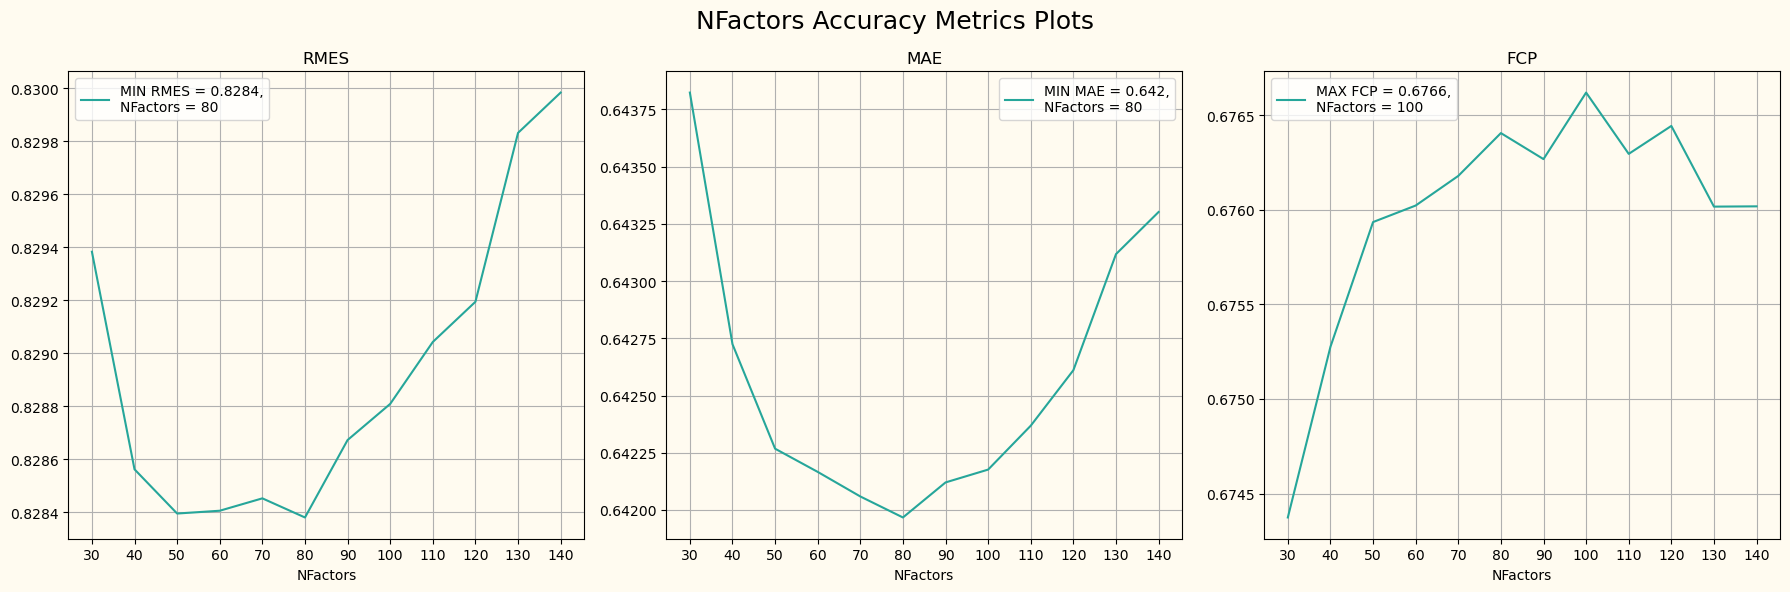

In [196]:
# Plots the 3 difference accuracy measurments for N factors
error_plts(nfact_df, 'NFactors')

In [211]:
# Test Different number of factors in the model
#eppoc_df = pd.DataFrame([])
parmet = [10,15,20,25,30,35,40]
for p in parmet:
    eppoc_df = pd.concat([eppoc_df,multytest_funksvd(trainset,testset,nf = 80 ,ne = p)])

eppoc_df

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,80,5.0,0.005,0.860702,0.676580,0.641634
1,80,10.0,0.005,0.844417,0.660873,0.658874
2,80,15.0,0.005,0.833148,0.648966,0.670836
3,80,20.0,0.005,0.828441,0.641941,0.676359
4,80,25.0,0.005,0.829435,0.639884,0.677314
5,80,30.0,0.005,0.833450,0.640489,0.676300
6,80,35.0,0.005,0.838582,0.642583,0.674911
0,80,40.0,0.005,0.844281,0.645565,0.672690


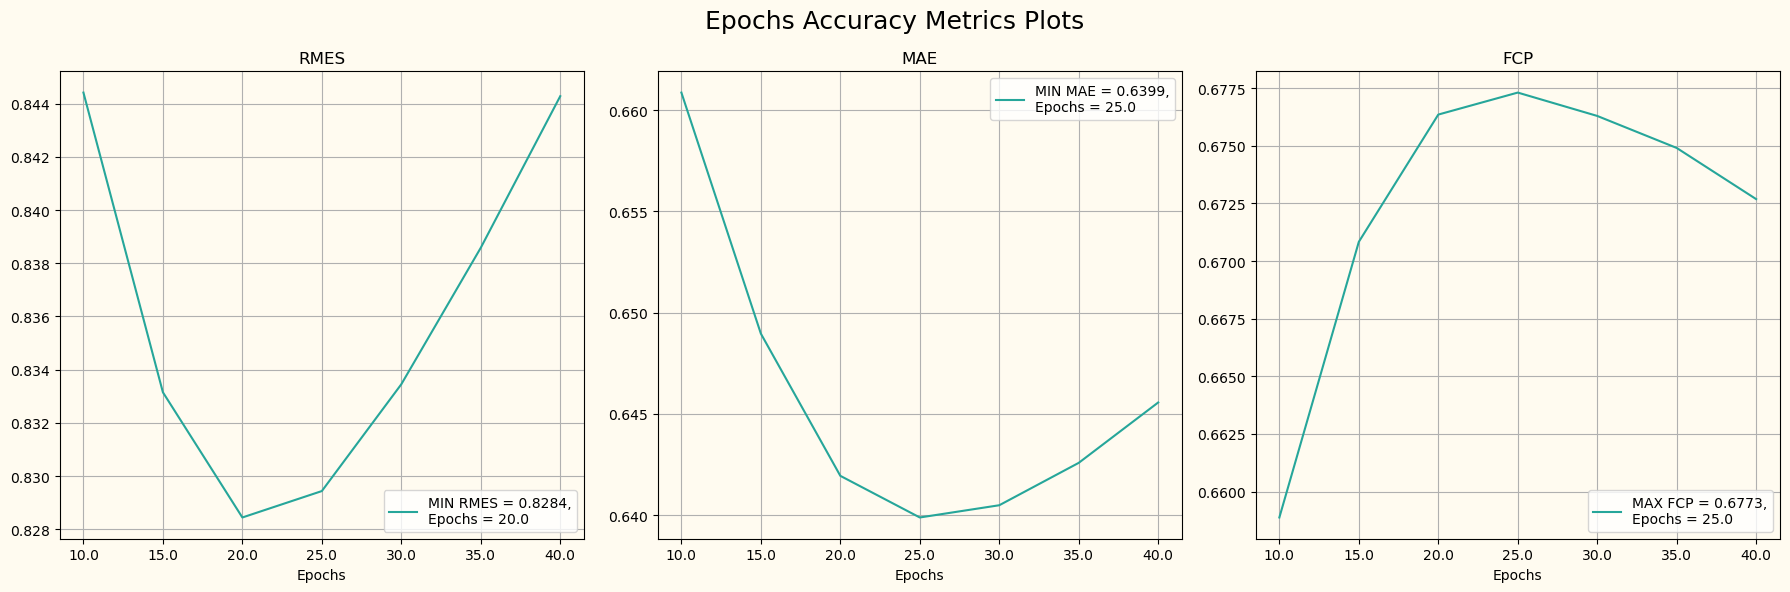

In [224]:
# Plots the 3 difference accuracy measurments for Eppocs
error_plts(eppoc_df, 'Epochs')

In [225]:
eppoc_df = eppoc_df.reset_index().drop(columns= 'index')
backup3 = eppoc_df.copy()
eppoc_df.to_csv('epchs_backup.csv')

In [236]:
# Test Different number of factors in the model
#llrate_df = pd.DataFrame([])
#parmet = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
parmet = [0.0025, 0.0075]
for p in parmet:
    llrate_df = pd.concat([llrate_df,multytest_funksvd(trainset,testset, nf = 80,ne = 25,lr = p)])

llrate_df

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,80,25,0.0001,2.983994,2.804587,0.221707
0,80,25,0.0005,0.908645,0.713436,0.626321
0,80,25,0.0010,0.849794,0.667199,0.651910
0,80,25,0.0050,0.829752,0.640090,0.677066
0,80,25,0.0100,0.858842,0.654511,0.666963
0,80,25,0.0500,0.986484,0.749318,0.621715
0,80,25,0.0025,0.834049,0.651130,0.668950
0,80,25,0.0075,0.843958,0.645853,0.672206


In [241]:
llrate_df

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,80,25,0.0001,2.983994,2.804587,0.221707
0,80,25,0.0005,0.908645,0.713436,0.626321
0,80,25,0.0010,0.849794,0.667199,0.651910
0,80,25,0.0025,0.834049,0.651130,0.668950
0,80,25,0.0050,0.829752,0.640090,0.677066
0,80,25,0.0075,0.843958,0.645853,0.672206
0,80,25,0.0100,0.858842,0.654511,0.666963
0,80,25,0.0500,0.986484,0.749318,0.621715


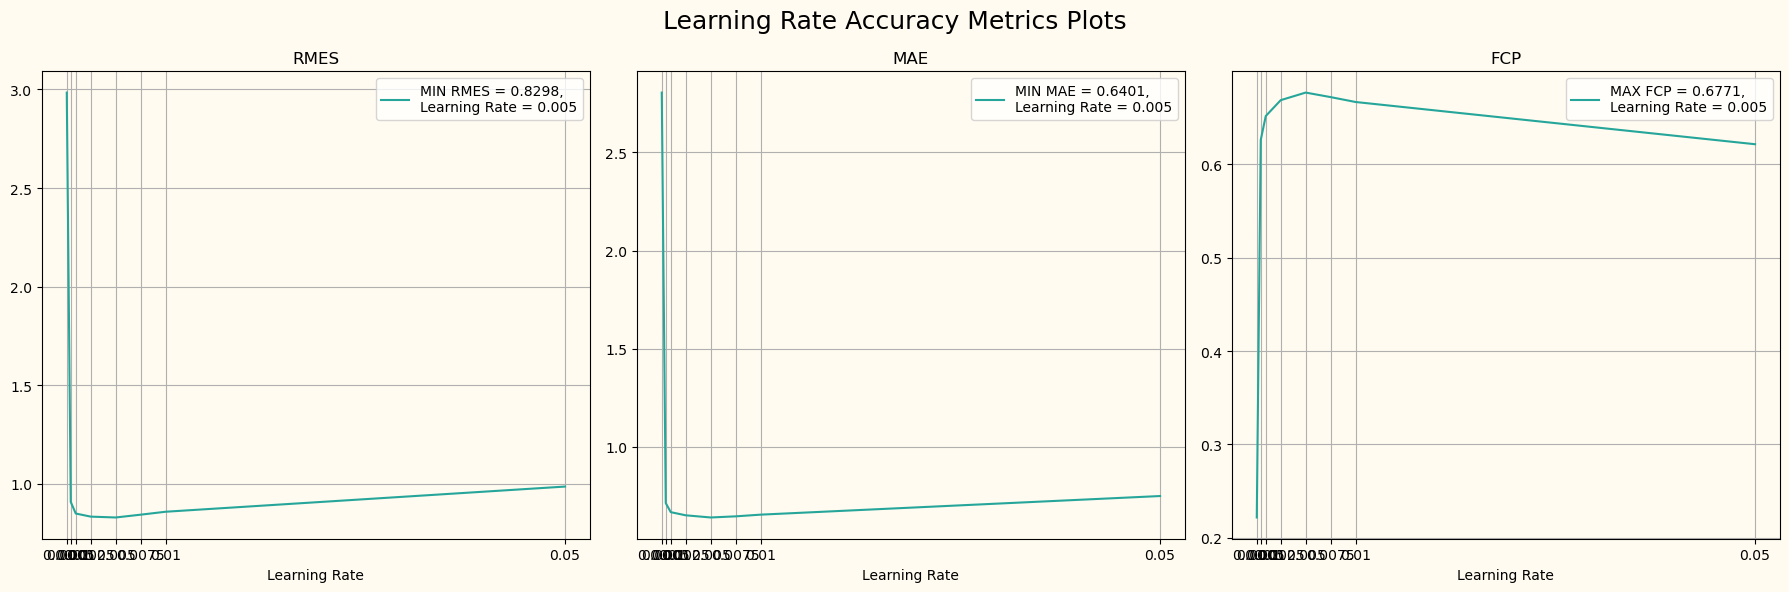

In [240]:
# Plots the 3 difference accuracy measurments for Learning Rate
error_plts(llrate_df, 'Learning Rate')

In [242]:
llrate_df = llrate_df.reset_index().drop(columns='index')
backup4 = llrate_df.copy()
backupf3 = llrate_df.copy()
eppoc_df.to_csv('llrate_backup.csv')

In [139]:
eppoc_df

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,80,5,0.005,0.860702,0.676580,0.641634
0,80,10,0.005,0.844417,0.660873,0.658874
0,80,15,0.005,0.833148,0.648966,0.670836
0,80,20,0.005,0.828441,0.641941,0.676359
0,80,25,0.005,0.829435,0.639884,0.677314
0,80,30,0.005,0.833450,0.640489,0.676300


In [76]:
backup = nfact_df.copy()

In [78]:
nfact_df.sort_values('RMES')

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,80,20,0.005,0.828379,0.641967,0.676405
0,50,20,0.005,0.828394,0.642268,0.675935
0,60,20,0.005,0.828405,0.642166,0.676022
0,70,20,0.005,0.828452,0.642059,0.676179
0,40,20,0.005,0.828561,0.642724,0.675275
0,90,20,0.005,0.828672,0.642120,0.676267
0,100,20,0.005,0.828808,0.642176,0.676619
0,110,20,0.005,0.829042,0.642368,0.676295
0,120,20,0.005,0.829194,0.642611,0.676443
0,30,20,0.005,0.829383,0.643824,0.674373


In [104]:
nfact_df.drop(nfact_df[nfact_df['NFactors'] < 21].index,inplace = True)

In [82]:
nfact_df['FCP'].max()

0.6766191030644577

In [117]:
nfact_df = nfact_df[nfact_df['NFactors'] < 143]

In [109]:
nfact_df = pd.read_csv('nfact_df_backup', index_col=0)
nfact_df

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,20,20,0.005,0.830510,0.645246,0.672867
0,30,20,0.005,0.829383,0.643824,0.674373
0,40,20,0.005,0.828561,0.642724,0.675275
0,50,20,0.005,0.828394,0.642268,0.675935
0,60,20,0.005,0.828405,0.642166,0.676022
0,70,20,0.005,0.828452,0.642059,0.676179
0,80,20,0.005,0.828379,0.641967,0.676405
0,90,20,0.005,0.828672,0.642120,0.676267
0,100,20,0.005,0.828808,0.642176,0.676619
0,110,20,0.005,0.829042,0.642368,0.676295


In [121]:
backup2 = nfact_df.copy()

In [110]:
backup.to_csv('nfact_df_backup')

In [142]:
nfact_df = backup2.copy()
nfact_df 

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,30,20,0.005,0.829383,0.643824,0.674373
0,40,20,0.005,0.828561,0.642724,0.675275
0,50,20,0.005,0.828394,0.642268,0.675935
0,60,20,0.005,0.828405,0.642166,0.676022
0,70,20,0.005,0.828452,0.642059,0.676179
0,80,20,0.005,0.828379,0.641967,0.676405
0,90,20,0.005,0.828672,0.642120,0.676267
0,100,20,0.005,0.828808,0.642176,0.676619
0,110,20,0.005,0.829042,0.642368,0.676295
0,120,20,0.005,0.829194,0.642611,0.676443


In [143]:
backup3

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,80,5,0.005,0.860702,0.676580,0.641634
0,80,10,0.005,0.844417,0.660873,0.658874
0,80,15,0.005,0.833148,0.648966,0.670836
0,80,20,0.005,0.828441,0.641941,0.676359
0,80,25,0.005,0.829435,0.639884,0.677314
0,80,30,0.005,0.833450,0.640489,0.676300


In [163]:
nfact_df= pd.read_csv('nfact_df_backup')
nfact_df.drop(columns = 'Unnamed: 0',inplace=True)
nfact_df.rename(columns = {'Epochs ' : 'Epochs'}, inplace=True)
nfact_df

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,20,20,0.005,0.830510,0.645246,0.672867
1,30,20,0.005,0.829383,0.643824,0.674373
2,40,20,0.005,0.828561,0.642724,0.675275
3,50,20,0.005,0.828394,0.642268,0.675935
4,60,20,0.005,0.828405,0.642166,0.676022
5,70,20,0.005,0.828452,0.642059,0.676179
6,80,20,0.005,0.828379,0.641967,0.676405
7,90,20,0.005,0.828672,0.642120,0.676267
8,100,20,0.005,0.828808,0.642176,0.676619
9,110,20,0.005,0.829042,0.642368,0.676295


In [164]:
backup = nfact_df.copy()
backup.to_csv('nfact_df_backup.csv')

In [165]:
nfact_df= nfact_df[(nfact_df['NFactors'] < 143) & (nfact_df['NFactors'] > 21)].reset_index().drop(columns= 'index')
backup2 = nfact_df.copy()

In [168]:
backup2

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,30,20,0.005,0.829383,0.643824,0.674373
1,40,20,0.005,0.828561,0.642724,0.675275
2,50,20,0.005,0.828394,0.642268,0.675935
3,60,20,0.005,0.828405,0.642166,0.676022
4,70,20,0.005,0.828452,0.642059,0.676179
5,80,20,0.005,0.828379,0.641967,0.676405
6,90,20,0.005,0.828672,0.642120,0.676267
7,100,20,0.005,0.828808,0.642176,0.676619
8,110,20,0.005,0.829042,0.642368,0.676295
9,120,20,0.005,0.829194,0.642611,0.676443


In [169]:
backup3 = backup3.rename(columns = {'Epochs ' : 'Epochs'}).reset_index().drop(columns= 'index')
backup3

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,80,5,0.005,0.860702,0.676580,0.641634
1,80,10,0.005,0.844417,0.660873,0.658874
2,80,15,0.005,0.833148,0.648966,0.670836
3,80,20,0.005,0.828441,0.641941,0.676359
4,80,25,0.005,0.829435,0.639884,0.677314
5,80,30,0.005,0.833450,0.640489,0.676300


In [218]:
backupfull = pd.concat([backupf1,backupf2]).reset_index().drop(columns= 'index')

backupfull

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,20,20.0,0.005,0.830510,0.645246,0.672867
1,30,20.0,0.005,0.829383,0.643824,0.674373
2,40,20.0,0.005,0.828561,0.642724,0.675275
3,50,20.0,0.005,0.828394,0.642268,0.675935
4,60,20.0,0.005,0.828405,0.642166,0.676022
5,70,20.0,0.005,0.828452,0.642059,0.676179
6,80,20.0,0.005,0.828379,0.641967,0.676405
7,90,20.0,0.005,0.828672,0.642120,0.676267
8,100,20.0,0.005,0.828808,0.642176,0.676619
9,110,20.0,0.005,0.829042,0.642368,0.676295


0     20
1     20
2     20
3     20
4     20
5     20
6     20
7     20
8     20
9     20
10    20
11    20
12    20
13    20
14    20
15     5
16    10
17    15
18    20
19    25
20    30
Name: Epochs, dtype: int64

In [178]:
eppoc_df.to_csv('epchs_backup.csv')

In [176]:
eppoc_df = eppoc_df.rename(columns = {'Epochs ' : 'Epochs'}).reset_index().drop(columns= 'index')


0     5
1    10
2    15
3    20
4    25
5    30
Name: Epochs, dtype: int64

In [177]:
eppoc_df

,NFactors,Epochs,Learning Rate,RMES,MAE,FCP
0,80,5,0.005,0.860702,0.676580,0.641634
1,80,10,0.005,0.844417,0.660873,0.658874
2,80,15,0.005,0.833148,0.648966,0.670836
3,80,20,0.005,0.828441,0.641941,0.676359
4,80,25,0.005,0.829435,0.639884,0.677314
5,80,30,0.005,0.833450,0.640489,0.676300


In [215]:
backupfull.to_csv('fullruns.csv')

In [1]:
nfact_df['RMES'].min()

NameError: name 'nfact_df' is not defined

In [194]:
nfact_df[nfact_df["RMES"] == nfact_df["RMES"].min()]['NFactors'].iloc[0]

80

In [216]:
backupf2 = backup3.copy()

In [217]:
backupf1 = backup.copy()

In [223]:
eppoc_df=eppoc_df.drop(0).reset_index().drop(columns= 'index')

In [6]:
nfact_df = pd.read_csv('nfact_df_backup.csv', index_col= 0 )
eppoc_df = pd.read_csv('epchs_backup.csv', index_col= 0 )
llrate_df = pd.read_csv('llrate_backup.csv', index_col= 0 )